In [1]:
import numpy as np 
import pandas as  pd 
import matplotlib.pyplot as plt

In [4]:
# Specify the date range
start_date = '2020-12-13'
end_date = '2021-12-09'

# load data from us_cases.csv
us_cases = pd.read_csv('original_data/us_vaccines.csv')
us_cases['date'] = pd.to_datetime(us_cases['Date'], format='%m/%d/%Y')

# Use boolean indexing to filter rows within the specified date range
filtered_df = us_cases[(us_cases['date'] >= start_date) & (us_cases['date'] <= end_date)]
filtered_df

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Novavax,Distributed_Unk_Manuf,Dist_Per_100K,...,Dist_Bivalent_MOD,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct,date
15104,12/09/2021,49,GU,271490,22500,78580,170410,NaN,0,161132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-09
15105,12/09/2021,49,TN,10482210,475900,3993940,6012370,NaN,0,153492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-09
15106,12/09/2021,49,IH2,2495675,99200,1147120,1249355,NaN,0,119822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-09
15107,12/09/2021,49,TX,50202395,2468200,18276100,29458095,NaN,0,173136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-09
15108,12/09/2021,49,NE,3252610,141800,1169540,1941270,NaN,0,168145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38483,12/13/2020,51,AS,3900,0,0,0,NaN,0,7003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-13
38484,12/13/2020,51,VI,975,0,0,0,NaN,0,931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-13
38485,12/13/2020,51,MP,4875,0,0,0,NaN,0,8570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-13
38486,12/13/2020,51,US,13650,0,0,0,NaN,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-13


In [21]:
state_list = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
        ]

# Make a new empty dataframe
new_df = pd.DataFrame()
for state in state_list:
    # Filter the rows by state
    state_df = filtered_df[filtered_df['Location'] == state]
    # Extract the new cases column and add it to the new_df with column heading = state , also add the date column 
    new_df[state] = state_df['Distributed'].values

# Pick every 7th entry 
new_df = new_df.iloc[::7, :]

print(new_df.head())
# Iterate from the top row to the second last row
for i in range(new_df.shape[0]-1): 
    new_df.iloc[i, :] = new_df.iloc[i, :] - new_df.iloc[i+1, :] 


print(new_df.head())
# SAVE the new_df to a csv file
new_df.to_csv('vaccine_data_real_test.csv', index=False)

         AL       AK        AZ       AR        CA        CO       CT       DE  \
0   7935800  1300725  12062310  4903950  72484765  10403005  7020885  1896105   
7   7880350  1281415  11857580  4871540  71231045  10264195  6884475  1876175   
14  7847520  1269725  11718130  4877430  70403965  10105605  6806625  1856355   
21  7750770  1253955  11552250  4785710  68761895   9802245  6672845  1838355   
28  7572650  1231935  11323430  4672550  67047845   9489135  6498415  1795325   

          FL        GA  ...       SD        TN        TX       UT       VT  \
0   39408285  17728505  ...  1542185  10482210  50202395  5141750  1349210   
7   38857805  17530925  ...  1506205  10320500  49398665  5045810  1320810   
14  38538075  17343825  ...  1483165  10256940  49043325  4974700  1298770   
21  37938145  17036635  ...  1463795  10095640  48207165  4872560  1265430   
28  36829085  16595545  ...  1431885   9840280  47151155  4725180  1233600   

          VA        WA       WV       WI    

579151165


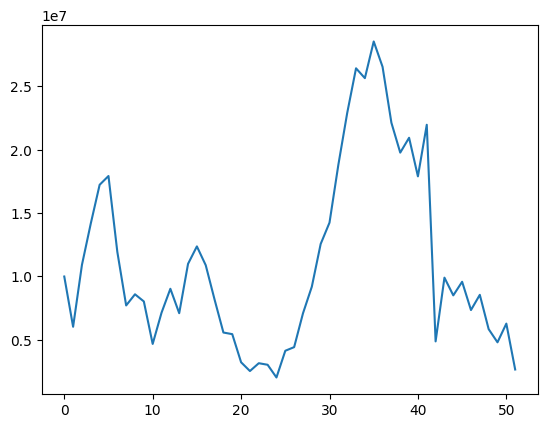

In [28]:
# make numpy array from the dataframe
new_df_array = new_df.to_numpy()
summed_array = np.sum(new_df_array, axis=1) 
vaccine_data = pd.DataFrame(summed_array,columns=['vaccines_available'])
vaccine_data.to_csv('vaccine_data_real.csv',index=False) 

#total sum of all the states
total_vaccines = np.sum(summed_array)
# print in millions
print(total_vaccines)
#plot summed_array
plt.plot(summed_array)
